In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from pandas import Series
from numpy import log

In [3]:
df = pd.read_csv('Data Historis ADRO.csv', sep = ';')
df.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,08/04/2025,1645,1725,1725,1600,"141,03M","-10,84%"
1,27/03/2025,1845,1840,1845,1805,"40,78M","0,27%"
2,26/03/2025,1840,1755,1850,1750,"58,51M","5,44%"
3,25/03/2025,1745,1725,1745,1710,"42,87M","-0,29%"
4,24/03/2025,1750,1790,1790,1700,"64,31M","-2,78%"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tanggal     2418 non-null   object
 1   Terakhir    2418 non-null   int64 
 2   Pembukaan   2418 non-null   int64 
 3   Tertinggi   2418 non-null   int64 
 4   Terendah    2418 non-null   int64 
 5   Vol         2418 non-null   object
 6   Perubahan%  2418 non-null   object
dtypes: int64(4), object(3)
memory usage: 132.4+ KB


In [5]:
df.describe()

,Terakhir,Pembukaan,Tertinggi,Terendah
count,2418.000000,2418.000000,2418.000000,2418.000000
mean,1847.840778,1851.376758,1882.106700,1818.213400
std,880.159029,880.454149,892.093272,868.671159
min,437.000000,440.000000,452.000000,437.000000
25%,1210.000000,1215.000000,1230.000000,1190.000000
50%,1690.000000,1690.000000,1710.000000,1665.000000
75%,2457.500000,2460.000000,2490.000000,2420.000000
max,4140.000000,4140.000000,4300.000000,4080.000000


In [6]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     2418 non-null   datetime64[ns]
 1   Terakhir    2418 non-null   int64         
 2   Pembukaan   2418 non-null   int64         
 3   Tertinggi   2418 non-null   int64         
 4   Terendah    2418 non-null   int64         
 5   Vol         2418 non-null   object        
 6   Perubahan%  2418 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 132.4+ KB


In [8]:
def convert_volume(vol_str):
    if isinstance(vol_str, str):
        vol_str = vol_str.replace(',', '.')
        multiplier = 1
        if vol_str.endswith('B'):
            multiplier = 1_000_000_000
            vol_str = vol_str.replace('B', '')
        elif vol_str.endswith('M'):
            multiplier = 1_000_000
            vol_str = vol_str.replace('M', '')
        elif vol_str.endswith('K'):
            multiplier = 1_000
            vol_str = vol_str.replace('K', '')
        return float(vol_str) * multiplier
    return vol_str

df['Vol'] = df['Vol'].apply(convert_volume)


In [9]:
df.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2025-04-08,1645,1725,1725,1600,141030000.0,"-10,84%"
1,2025-03-27,1845,1840,1845,1805,40780000.0,"0,27%"
2,2025-03-26,1840,1755,1850,1750,58510000.0,"5,44%"
3,2025-03-25,1745,1725,1745,1710,42870000.0,"-0,29%"
4,2025-03-24,1750,1790,1790,1700,64310000.0,"-2,78%"


In [10]:
df['Terakhir'] = df['Terakhir'].astype(str).str.replace(',', '.').astype(float)
df['Pembukaan'] = df['Pembukaan'].astype(str).str.replace(',', '.').astype(float)
df['Tertinggi'] = df['Tertinggi'].astype(str).str.replace(',', '.').astype(float)
# df['Perubahan%'] = df['Perubahan%'].astype(str).str.replace(',', '.').astype(float)

In [11]:

df['Terendah'] = df['Terendah'].astype(str).str.replace(',', '.').astype(float)

In [12]:
df['Perubahan%'] = df['Perubahan%'].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)


In [13]:
df['Vol'] = df['Vol'].astype(str).str.replace(',', '.').astype(float)


In [14]:
df['PriceTy'] = (df['Tertinggi'] + df['Terendah'] + df['Terakhir']) / 3
df['PriceVol'] = df['PriceTy'] * df['Vol']
df['Cumulative'] = df['Vol'].cumsum()
df['CumulativePriceVolume'] = df['PriceVol'].cumsum()
df['VWAP'] = df['CumulativePriceVolume'] / df['Cumulative']

In [ ]:
df['Typical_Price'] = (df['Tertinggi'] + df['Terendah'] + df['Terakhir']) / 3
df['TPxVol'] = df['Typical_Price'] * df['Vol']
df['Cum_TPxVol'] = df['TPxVol'].cumsum()
df['Cum_Vol'] = df['Vol'].cumsum()
df['VWAP'] = df['Cum_TPxVol'] / df['Cum_Vol']

In [15]:
df.isnull().sum()

,0
Tanggal,0
Terakhir,0
Pembukaan,0
Tertinggi,0
Terendah,0
Vol,0
Perubahan%,0
PriceTy,0
PriceVol,0
Cumulative,0


In [16]:
df.duplicated().sum()

0

In [17]:
DataFrame = df[['Tanggal', 'Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol', 'Perubahan%', 'VWAP']]

In [18]:
DataFrame.head(10)

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%,VWAP
0,2025-04-08,1645.0,1725.0,1725.0,1600.0,141030000.0,-10.84,1656.666667
1,2025-03-27,1845.0,1840.0,1845.0,1805.0,40780000.0,0.27,1695.919183
2,2025-03-26,1840.0,1755.0,1850.0,1750.0,58510000.0,5.44,1724.505659
3,2025-03-25,1745.0,1725.0,1745.0,1710.0,42870000.0,-0.29,1725.842014
4,2025-03-24,1750.0,1790.0,1790.0,1700.0,64310000.0,-2.78,1729.695923
5,2025-03-21,1800.0,1800.0,1805.0,1745.0,72310000.0,0.00,1738.934677
6,2025-03-20,1800.0,1810.0,1860.0,1785.0,76900000.0,0.00,1750.711012
7,2025-03-19,1800.0,1790.0,1810.0,1755.0,58040000.0,0.28,1754.647198
8,2025-03-18,1795.0,1815.0,1820.0,1680.0,92900000.0,-1.10,1756.132222
9,2025-03-17,1815.0,1810.0,1825.0,1765.0,65130000.0,0.28,1760.292914


<Axes: >

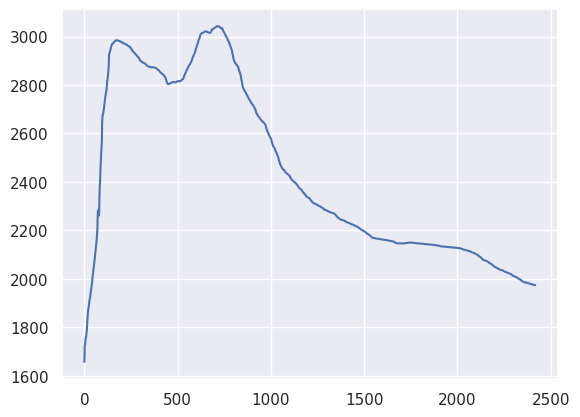

In [19]:
DataFrame['VWAP'].plot()

In [20]:
DataFrame.iloc[0:200]

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%,VWAP
0,2025-04-08,1645.0,1725.0,1725.0,1600.0,141030000.0,-10.84,1656.666667
1,2025-03-27,1845.0,1840.0,1845.0,1805.0,40780000.0,0.27,1695.919183
2,2025-03-26,1840.0,1755.0,1850.0,1750.0,58510000.0,5.44,1724.505659
3,2025-03-25,1745.0,1725.0,1745.0,1710.0,42870000.0,-0.29,1725.842014
4,2025-03-24,1750.0,1790.0,1790.0,1700.0,64310000.0,-2.78,1729.695923
...,...,...,...,...,...,...,...,...
195,2024-06-13,2780.0,2820.0,2830.0,2750.0,23160000.0,-0.36,2978.693306
196,2024-06-12,2790.0,2740.0,2810.0,2730.0,41920000.0,2.57,2978.185622
197,2024-06-11,2720.0,2750.0,2770.0,2720.0,27030000.0,-1.09,2977.794909
198,2024-06-10,2750.0,2840.0,2850.0,2710.0,48410000.0,-3.17,2977.194602


In [21]:
import statsmodels.api as sm

In [22]:
dFrame = DataFrame[['Tanggal', 'Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol','VWAP']]

In [23]:
dFrame.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,VWAP
0,2025-04-08,1645.0,1725.0,1725.0,1600.0,141030000.0,1656.666667
1,2025-03-27,1845.0,1840.0,1845.0,1805.0,40780000.0,1695.919183
2,2025-03-26,1840.0,1755.0,1850.0,1750.0,58510000.0,1724.505659
3,2025-03-25,1745.0,1725.0,1745.0,1710.0,42870000.0,1725.842014
4,2025-03-24,1750.0,1790.0,1790.0,1700.0,64310000.0,1729.695923


In [24]:
# dFrame.dropna()
dFrame = dFrame.dropna().reset_index(drop=True)

In [25]:
dFrame

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,VWAP
0,2025-04-08,1645.0,1725.0,1725.0,1600.0,141030000.0,1656.666667
1,2025-03-27,1845.0,1840.0,1845.0,1805.0,40780000.0,1695.919183
2,2025-03-26,1840.0,1755.0,1850.0,1750.0,58510000.0,1724.505659
3,2025-03-25,1745.0,1725.0,1745.0,1710.0,42870000.0,1725.842014
4,2025-03-24,1750.0,1790.0,1790.0,1700.0,64310000.0,1729.695923
...,...,...,...,...,...,...,...
2413,2015-04-13,955.0,970.0,980.0,955.0,34570000.0,1974.329954
2414,2015-04-10,975.0,980.0,980.0,960.0,18830000.0,1974.221051
2415,2015-04-09,980.0,965.0,980.0,965.0,19660000.0,1974.107750
2416,2015-04-08,965.0,980.0,985.0,965.0,28450000.0,1973.943292


In [ ]:
# dFrame['VWAP'].dropna()
# dFrame['Vol.'].dropna()

In [26]:
dFrame['VWAP']

,VWAP
0,1656.666667
1,1695.919183
2,1724.505659
3,1725.842014
4,1729.695923
...,...
2413,1974.329954
2414,1974.221051
2415,1974.107750
2416,1973.943292


In [27]:

dFrame['Vol']

,Vol
0,141030000.0
1,40780000.0
2,58510000.0
3,42870000.0
4,64310000.0
...,...
2413,34570000.0
2414,18830000.0
2415,19660000.0
2416,28450000.0


In [28]:

print(dFrame.isnull().sum())


Tanggal      0
Terakhir     0
Pembukaan    0
Tertinggi    0
Terendah     0
Vol          0
VWAP         0
dtype: int64


In [29]:
print(sm.stats.durbin_watson(dFrame['VWAP']))
print(sm.stats.durbin_watson(dFrame['Pembukaan']))
print(sm.stats.durbin_watson(dFrame['Terakhir']))
print(sm.stats.durbin_watson(dFrame['Vol']))
print(sm.stats.durbin_watson(dFrame['Tertinggi']))
print(sm.stats.durbin_watson(dFrame['Terendah']))

1.944226963370474e-06
0.0008471917291159317
0.0008110957038875279
0.34033594778792203
0.0006961125609876543
0.0006933407346947476


In [30]:
dFrame.describe()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,VWAP
count,2418,2418.000000,2418.000000,2418.000000,2418.000000,2.418000e+03,2418.000000
mean,2020-03-31 02:36:01.786600448,1847.840778,1851.376758,1882.106700,1818.213400,7.172272e+07,2438.174014
min,2015-04-07 00:00:00,437.000000,440.000000,452.000000,437.000000,4.120000e+06,1656.666667
25%,2017-10-05 06:00:00,1210.000000,1215.000000,1230.000000,1190.000000,3.396250e+07,2139.470238
50%,2020-03-28 12:00:00,1690.000000,1690.000000,1710.000000,1665.000000,5.465500e+07,2285.468242
75%,2022-09-25 06:00:00,2457.500000,2460.000000,2490.000000,2420.000000,8.682250e+07,2837.753062
max,2025-04-08 00:00:00,4140.000000,4140.000000,4300.000000,4080.000000,1.050000e+09,3043.403661
std,NaN,880.159029,880.454149,892.093272,868.671159,6.247727e+07,364.316693


In [31]:
dFrame.nunique()

,0
Tanggal,2418
Terakhir,513
Pembukaan,503
Tertinggi,503
Terendah,503
Vol,2175
VWAP,2418


In [32]:
dFrame1 = dFrame.copy()

In [33]:
dFrame1

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,VWAP
0,2025-04-08,1645.0,1725.0,1725.0,1600.0,141030000.0,1656.666667
1,2025-03-27,1845.0,1840.0,1845.0,1805.0,40780000.0,1695.919183
2,2025-03-26,1840.0,1755.0,1850.0,1750.0,58510000.0,1724.505659
3,2025-03-25,1745.0,1725.0,1745.0,1710.0,42870000.0,1725.842014
4,2025-03-24,1750.0,1790.0,1790.0,1700.0,64310000.0,1729.695923
...,...,...,...,...,...,...,...
2413,2015-04-13,955.0,970.0,980.0,955.0,34570000.0,1974.329954
2414,2015-04-10,975.0,980.0,980.0,960.0,18830000.0,1974.221051
2415,2015-04-09,980.0,965.0,980.0,965.0,19660000.0,1974.107750
2416,2015-04-08,965.0,980.0,985.0,965.0,28450000.0,1973.943292


In [34]:
dFrame1.set_index('Tanggal', inplace=True)

In [35]:
dFrame1

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,VWAP
Tanggal,,,,,,
2025-04-08,1645.0,1725.0,1725.0,1600.0,141030000.0,1656.666667
2025-03-27,1845.0,1840.0,1845.0,1805.0,40780000.0,1695.919183
2025-03-26,1840.0,1755.0,1850.0,1750.0,58510000.0,1724.505659
2025-03-25,1745.0,1725.0,1745.0,1710.0,42870000.0,1725.842014
2025-03-24,1750.0,1790.0,1790.0,1700.0,64310000.0,1729.695923
...,...,...,...,...,...,...
2015-04-13,955.0,970.0,980.0,955.0,34570000.0,1974.329954
2015-04-10,975.0,980.0,980.0,960.0,18830000.0,1974.221051
2015-04-09,980.0,965.0,980.0,965.0,19660000.0,1974.107750


In [36]:
dFrame1

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,VWAP
Tanggal,,,,,,
2025-04-08,1645.0,1725.0,1725.0,1600.0,141030000.0,1656.666667
2025-03-27,1845.0,1840.0,1845.0,1805.0,40780000.0,1695.919183
2025-03-26,1840.0,1755.0,1850.0,1750.0,58510000.0,1724.505659
2025-03-25,1745.0,1725.0,1745.0,1710.0,42870000.0,1725.842014
2025-03-24,1750.0,1790.0,1790.0,1700.0,64310000.0,1729.695923
...,...,...,...,...,...,...
2015-04-13,955.0,970.0,980.0,955.0,34570000.0,1974.329954
2015-04-10,975.0,980.0,980.0,960.0,18830000.0,1974.221051
2015-04-09,980.0,965.0,980.0,965.0,19660000.0,1974.107750


In [37]:
start_date = dFrame1.index.min()
end_date = dFrame1.index.max()

In [38]:
print("Start Date of Stocks :", start_date)
print("End Date of Stocks :", end_date)

Start Date of Stocks : 2015-04-07 00:00:00
End Date of Stocks : 2025-04-08 00:00:00


<Axes: xlabel='Tanggal'>

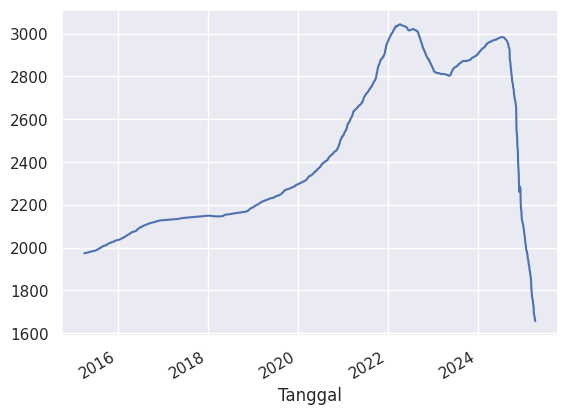

In [39]:
dFrame1['VWAP'].plot()

In [40]:
dFrame1['Time_Stamp'] = pd.DataFrame(DataFrame, columns=['Tanggal'])

In [41]:
DataFrame['Tanggal']

,Tanggal
0,2025-04-08
1,2025-03-27
2,2025-03-26
3,2025-03-25
4,2025-03-24
...,...
2413,2015-04-13
2414,2015-04-10
2415,2015-04-09
2416,2015-04-08


In [42]:
dFrame1

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,VWAP,Time_Stamp
Tanggal,,,,,,,
2025-04-08,1645.0,1725.0,1725.0,1600.0,141030000.0,1656.666667,NaT
2025-03-27,1845.0,1840.0,1845.0,1805.0,40780000.0,1695.919183,NaT
2025-03-26,1840.0,1755.0,1850.0,1750.0,58510000.0,1724.505659,NaT
2025-03-25,1745.0,1725.0,1745.0,1710.0,42870000.0,1725.842014,NaT
2025-03-24,1750.0,1790.0,1790.0,1700.0,64310000.0,1729.695923,NaT
...,...,...,...,...,...,...,...
2015-04-13,955.0,970.0,980.0,955.0,34570000.0,1974.329954,NaT
2015-04-10,975.0,980.0,980.0,960.0,18830000.0,1974.221051,NaT
2015-04-09,980.0,965.0,980.0,965.0,19660000.0,1974.107750,NaT


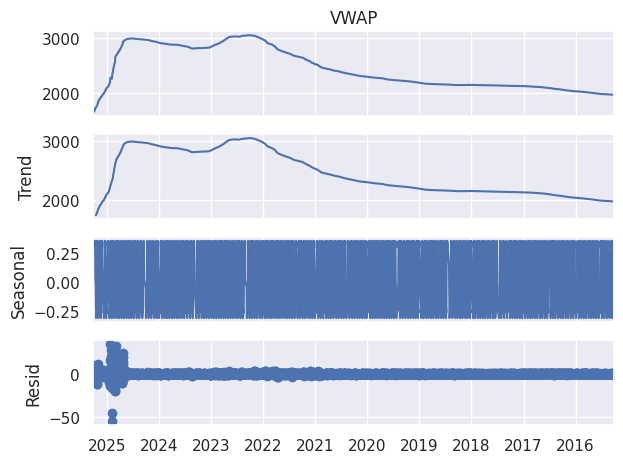

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompse = seasonal_decompose(dFrame1['VWAP'],
model='additive', period=12)
decompse.plot()
plt.show()

In [44]:
trend = decompse.trend
seasonality = decompse.seasonal
residual = decompse.resid
print('Trend', '\n', trend.head(12),'\n')
print('Seasoanlity', '\n', seasonality.head(12),'\n')
print('Residual', '\n', residual.head(12),'\n')

Trend 
 Tanggal
2025-04-08            NaN
2025-03-27            NaN
2025-03-26            NaN
2025-03-25            NaN
2025-03-24            NaN
2025-03-21            NaN
2025-03-20    1740.990243
2025-03-19    1749.787816
2025-03-18    1756.699759
2025-03-17    1763.499113
2025-03-14    1771.590192
2025-03-13    1780.382090
Name: trend, dtype: float64 

Seasoanlity 
 Tanggal
2025-04-08    0.352852
2025-03-27    0.298974
2025-03-26    0.355433
2025-03-25    0.147816
2025-03-24    0.020760
2025-03-21   -0.051162
2025-03-20   -0.217137
2025-03-19   -0.312909
2025-03-18   -0.234762
2025-03-17   -0.268594
2025-03-14   -0.236030
2025-03-13    0.144759
Name: seasonal, dtype: float64 

Residual 
 Tanggal
2025-04-08         NaN
2025-03-27         NaN
2025-03-26         NaN
2025-03-25         NaN
2025-03-24         NaN
2025-03-21         NaN
2025-03-20    9.937906
2025-03-19    5.172292
2025-03-18   -0.332776
2025-03-17   -2.937605
2025-03-14   -6.027813
2025-03-13   -7.876219
Name: resid, dty

In [178]:
# Ubah kolom 'Tanggal' menjadi datetime jika belum
# dFrame1['Tanggal'] = pd.to_datetime(dFrame1['Tanggal'])

# # Set kolom 'Tanggal' sebagai index
# dFrame1.set_index('Tanggal', inplace=True)

# # Sekarang bisa ambil bulan dan tahun
# dFrame1['Bulan'] = dFrame1.index.month
# dFrame1['Tahun'] = dFrame1.index.year


KeyError: 'Tanggal'

In [45]:
dFrame1['Bulan'] = dFrame1.index.month
dFrame1['Tahun'] = dFrame1.index.year
# dFrame1.head()
dFrame1.tail()

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,VWAP,Time_Stamp,Bulan,Tahun
Tanggal,,,,,,,,,
2015-04-13,955.0,970.0,980.0,955.0,34570000.0,1974.329954,NaT,4,2015
2015-04-10,975.0,980.0,980.0,960.0,18830000.0,1974.221051,NaT,4,2015
2015-04-09,980.0,965.0,980.0,965.0,19660000.0,1974.107750,NaT,4,2015
2015-04-08,965.0,980.0,985.0,965.0,28450000.0,1973.943292,NaT,4,2015
2015-04-07,980.0,985.0,990.0,975.0,11250000.0,1973.878924,NaT,4,2015


In [ ]:
# dFrame1['VWAP_diff'] = dFrame1['VWAP'].diff().dropna().reset_index(drop=True)

In [46]:
dFrame1

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,VWAP,Time_Stamp,Bulan,Tahun
Tanggal,,,,,,,,,
2025-04-08,1645.0,1725.0,1725.0,1600.0,141030000.0,1656.666667,NaT,4,2025
2025-03-27,1845.0,1840.0,1845.0,1805.0,40780000.0,1695.919183,NaT,3,2025
2025-03-26,1840.0,1755.0,1850.0,1750.0,58510000.0,1724.505659,NaT,3,2025
2025-03-25,1745.0,1725.0,1745.0,1710.0,42870000.0,1725.842014,NaT,3,2025
2025-03-24,1750.0,1790.0,1790.0,1700.0,64310000.0,1729.695923,NaT,3,2025
...,...,...,...,...,...,...,...,...,...
2015-04-13,955.0,970.0,980.0,955.0,34570000.0,1974.329954,NaT,4,2015
2015-04-10,975.0,980.0,980.0,960.0,18830000.0,1974.221051,NaT,4,2015
2015-04-09,980.0,965.0,980.0,965.0,19660000.0,1974.107750,NaT,4,2015


In [47]:
dFrame1.index.min()
dFrame1.index.max()

Timestamp('2025-04-08 00:00:00')

In [48]:
dFrame1 = dFrame1.sort_index(ascending=True)

# Now do the split
split_date = dFrame1.index[int(len(dFrame) * 0.8)]
train = dFrame1[:split_date]
test = dFrame1[split_date:]

print(f"Train data: {train.index[0]} to {train.index[-1]}")
print(f"Test data : {test.index[0]} to {test.index[-1]}")

Train data: 2015-04-07 00:00:00 to 2023-03-15 00:00:00
Test data : 2023-03-15 00:00:00 to 2025-04-08 00:00:00


In [49]:
train['VWAP']

,VWAP
Tanggal,
2015-04-07,1973.878924
2015-04-08,1973.943292
2015-04-09,1974.107750
2015-04-10,1974.221051
2015-04-13,1974.329954
...,...
2023-03-09,2810.957319
2023-03-10,2810.813647
2023-03-13,2810.758843


In [50]:
test['VWAP']

,VWAP
Tanggal,
2023-03-15,2810.625680
2023-03-16,2810.689841
2023-03-17,2811.185542
2023-03-20,2811.454319
2023-03-21,2811.519992
...,...
2025-03-24,1729.695923
2025-03-25,1725.842014
2025-03-26,1724.505659


In [51]:
from statsmodels.tsa.stattools import adfuller
adfuller(train['VWAP'])

(-0.6868590292503106,
 0.8501240463669185,
 10,
 1924,
 {'1%': -3.43375335030681,
  '5%': -2.863043384324392,
  '10%': -2.5675703430245376},
 2837.0968661586776)

In [52]:
def check_adftest(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey-Fuller Test")
    labels = ['ADF Test Statistic', 'P-Value', '#Lags Used', 'Number of Observations Used']

    for label, value in zip(labels, result[:4]):
        print(f"{label} -----> {value}")

    if result[1] <= 0.05:
        print("\nStrong evidence against the null hypothesis (unit root). The time series is **stationary**.")
    else:
        print("\nWeak evidence against the null hypothesis. The time series is **non-stationary**.")

check_adftest(train['VWAP'])

Augmented Dickey-Fuller Test
ADF Test Statistic -----> -0.6868590292503106
P-Value -----> 0.8501240463669185
#Lags Used -----> 10
Number of Observations Used -----> 1924

Weak evidence against the null hypothesis. The time series is **non-stationary**.


In [ ]:
import numpy as np

In [ ]:
dFrameDiff = dFrame1.copy()

In [ ]:
dFrameDiff['log_VWAP'] = np.log(dFrameDiff['VWAP'])

In [53]:
def make_stationary(series):

    differenced_series = series.diff().dropna()
    return differenced_series


vwap_diff = make_stationary(train['VWAP'])


check_adftest(vwap_diff)

Augmented Dickey-Fuller Test
ADF Test Statistic -----> -3.766791632699133
P-Value -----> 0.003265952009865165
#Lags Used -----> 9
Number of Observations Used -----> 1924

Strong evidence against the null hypothesis (unit root). The time series is **stationary**.


In [ ]:
dFrameDiff

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,VWAP,Time_Stamp,Bulan,Tahun,VWAP_diff,log_VWAP
Tanggal,,,,,,,,,,,
2025-04-08,1645.0,1725.0,1725.0,1600.0,141030000.0,1656.666667,2025-04-08,4,2025,NaN,7.412563
2025-03-27,1845.0,1840.0,1845.0,1805.0,40780000.0,1695.919183,2025-03-27,3,2025,NaN,7.435980
2025-03-26,1840.0,1755.0,1850.0,1750.0,58510000.0,1724.505659,2025-03-26,3,2025,NaN,7.452696
2025-03-25,1745.0,1725.0,1745.0,1710.0,42870000.0,1725.842014,2025-03-25,3,2025,NaN,7.453470
2025-03-24,1750.0,1790.0,1790.0,1700.0,64310000.0,1729.695923,2025-03-24,3,2025,NaN,7.455701
...,...,...,...,...,...,...,...,...,...,...,...
2015-04-13,955.0,970.0,980.0,955.0,34570000.0,1974.329954,2015-04-13,4,2015,NaN,7.587984
2015-04-10,975.0,980.0,980.0,960.0,18830000.0,1974.221051,2015-04-10,4,2015,NaN,7.587929
2015-04-09,980.0,965.0,980.0,965.0,19660000.0,1974.107750,2015-04-09,4,2015,NaN,7.587872


In [ ]:
dFrameDiff = dFrameDiff.sort_index(ascending=True)

# Now do the split
split_date = dFrameDiff.index[int(len(dFrameDiff) * 0.8)]
trainlog = dFrameDiff[:split_date]
testlog = dFrameDiff[split_date:]

print(f"Train data: {train.index[0]} to {train.index[-1]}")
print(f"Test data : {test.index[0]} to {test.index[-1]}")

Train data: 0 to 1933
Test data : 1934 to 2417


In [ ]:
trainlog['log_VWAP']

,log_VWAP
Tanggal,
2015-04-07,7.587756
2015-04-08,7.587788
2015-04-09,7.587872
2015-04-10,7.587929
2015-04-13,7.587984
...,...
2023-03-09,7.941280
2023-03-10,7.941229
2023-03-13,7.941210


In [ ]:
dFrameDiff

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,VWAP,Time_Stamp,Bulan,Tahun,VWAP_diff,log_VWAP
Tanggal,,,,,,,,,,,
2015-04-07,980.0,985.0,990.0,975.0,11250000.0,1973.878924,2015-04-07,4,2015,NaN,7.587756
2015-04-08,965.0,980.0,985.0,965.0,28450000.0,1973.943292,2015-04-08,4,2015,NaN,7.587788
2015-04-09,980.0,965.0,980.0,965.0,19660000.0,1974.107750,2015-04-09,4,2015,NaN,7.587872
2015-04-10,975.0,980.0,980.0,960.0,18830000.0,1974.221051,2015-04-10,4,2015,NaN,7.587929
2015-04-13,955.0,970.0,980.0,955.0,34570000.0,1974.329954,2015-04-13,4,2015,NaN,7.587984
...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,1750.0,1790.0,1790.0,1700.0,64310000.0,1729.695923,2025-03-24,3,2025,NaN,7.455701
2025-03-25,1745.0,1725.0,1745.0,1710.0,42870000.0,1725.842014,2025-03-25,3,2025,NaN,7.453470
2025-03-26,1840.0,1755.0,1850.0,1750.0,58510000.0,1724.505659,2025-03-26,3,2025,NaN,7.452696


In [ ]:
dFrameDiff['log_diff'] = dFrameDiff['log_VWAP'].diff().dropna()

In [ ]:
dFrameDiff

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,VWAP,Time_Stamp,Bulan,Tahun,VWAP_diff,log_VWAP,log_diff
Tanggal,,,,,,,,,,,,
2015-04-07,980.0,985.0,990.0,975.0,11250000.0,1973.878924,2015-04-07,4,2015,NaN,7.587756,NaN
2015-04-08,965.0,980.0,985.0,965.0,28450000.0,1973.943292,2015-04-08,4,2015,NaN,7.587788,0.000033
2015-04-09,980.0,965.0,980.0,965.0,19660000.0,1974.107750,2015-04-09,4,2015,NaN,7.587872,0.000083
2015-04-10,975.0,980.0,980.0,960.0,18830000.0,1974.221051,2015-04-10,4,2015,NaN,7.587929,0.000057
2015-04-13,955.0,970.0,980.0,955.0,34570000.0,1974.329954,2015-04-13,4,2015,NaN,7.587984,0.000055
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,1750.0,1790.0,1790.0,1700.0,64310000.0,1729.695923,2025-03-24,3,2025,NaN,7.455701,-0.005327
2025-03-25,1745.0,1725.0,1745.0,1710.0,42870000.0,1725.842014,2025-03-25,3,2025,NaN,7.453470,-0.002231
2025-03-26,1840.0,1755.0,1850.0,1750.0,58510000.0,1724.505659,2025-03-26,3,2025,NaN,7.452696,-0.000775


In [ ]:
dFrameDiff['log_diff_2'] = dFrameDiff['log_diff'].diff().dropna()

In [ ]:
check_adftest(dFrameDiff['log_diff_2'].dropna())

Augmented Dickey-Fuller Test
ADF Test Statistic -----> -13.427133171992809
P-Value -----> 4.0810842479281187e-25
#Lags Used -----> 23
Number of Observations Used -----> 2392

Strong evidence against the null hypothesis (unit root). The time series is **stationary**.


In [189]:
vwap_diff

,VWAP
Tanggal,
2015-04-08,0.064368
2015-04-09,0.164458
2015-04-10,0.113300
2015-04-13,0.108903
2015-04-14,0.201659
...,...
2023-03-09,-0.162040
2023-03-10,-0.143672
2023-03-13,-0.054804


In [54]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [55]:
kurtosis_value = vwap_diff.kurtosis()


In [56]:
print(kurtosis_value)

8.565848190904248


In [57]:
skewness_value = vwap_diff.skew()


In [58]:
print(skewness_value)

0.7821131657675767


In [59]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [198]:
!pip uninstall pmdarima -y

Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4


In [201]:
!pip uninstall -y pmdarima
!pip install numpy==1.24.4
!pip install --no-cache-dir pmdarima



Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you hav

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.4 MB/s eta 0:00:00


In [60]:
from pmdarima import auto_arima

In [62]:
from pmdarima import auto_arima
# auto_arima mencari p, d, q optimal
stepwise_model = auto_arima(vwap_diff,
                             start_p=0, start_q=0,
                             max_p=5, max_q=5,
                             d=1,                      # Sudah differencing sekali
                             seasonal=False,           # Karena data bukan musiman
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)

# Menampilkan hasil model
print(stepwise_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3565.783, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3111.182, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2898.818, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3563.783, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2894.445, Time=1.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2881.158, Time=2.63 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3032.156, Time=0.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2882.797, Time=1.89 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2898.442, Time=1.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2899.170, Time=3.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2965.639, Time=1.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2884.692, Time=3.93 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2879.161, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2892.447, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0]          

In [ ]:
auto_model = auto_arima(vwap_diff, seasonal=False, trace=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11474.514, Time=3.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11003.181, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11266.952, Time=0.98 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11455.323, Time=1.63 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11005.181, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11476.848, Time=1.62 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-11478.473, Time=1.27 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-11476.060, Time=0.98 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11474.058, Time=1.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-11482.116, Time=0.89 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-11484.336, Time=5.43 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-11484.097, Time=1.32 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-11479.620, Time=4.56 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-11485.502, Time=4.15 sec
 ARIM

In [63]:
model = ARIMA(vwap_diff, order=(2,1,1))
result = model.fit()
print(result.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   VWAP   No. Observations:                 1934
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1435.581
Date:                Thu, 10 Apr 2025   AIC                           2879.161
Time:                        09:52:25   BIC                           2901.428
Sample:                             0   HQIC                          2887.351
                               - 1934                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1837      0.019      9.897      0.000       0.147       0.220
ar.L2          0.1293      0.013      9.855      0.000       0.104       0.155
ma.L1         -0.8335      0.012    -67.780      0.0

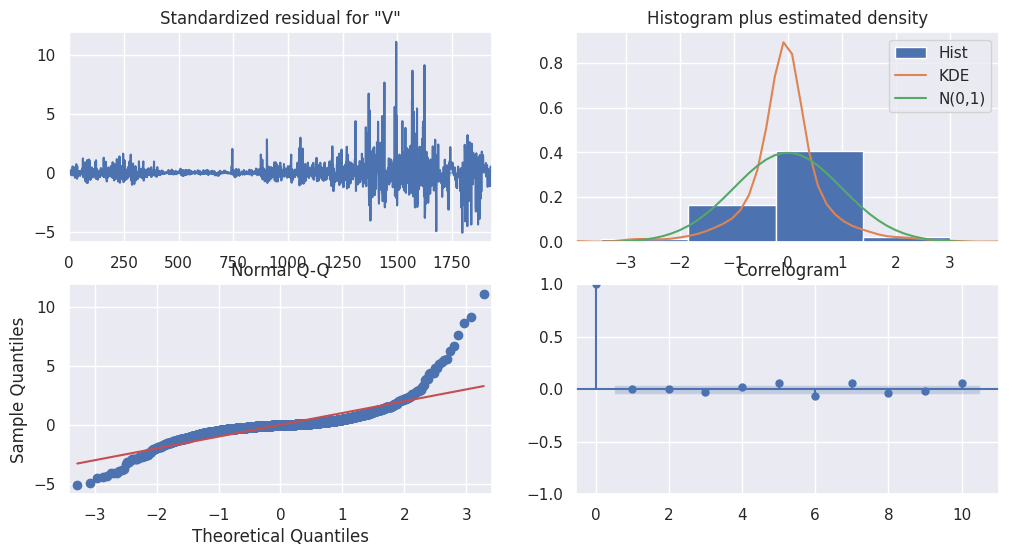

In [64]:
result.plot_diagnostics(figsize=(12, 6))
plt.show()

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dFrame1['VWAP'].values.reshape(-1, 1))
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 10
X, y = create_sequences(scaled_data, n_steps)


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [66]:
dFrame1

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,VWAP,Time_Stamp,Bulan,Tahun
Tanggal,,,,,,,,,
2015-04-07,980.0,985.0,990.0,975.0,11250000.0,1973.878924,NaT,4,2015
2015-04-08,965.0,980.0,985.0,965.0,28450000.0,1973.943292,NaT,4,2015
2015-04-09,980.0,965.0,980.0,965.0,19660000.0,1974.107750,NaT,4,2015
2015-04-10,975.0,980.0,980.0,960.0,18830000.0,1974.221051,NaT,4,2015
2015-04-13,955.0,970.0,980.0,955.0,34570000.0,1974.329954,NaT,4,2015
...,...,...,...,...,...,...,...,...,...
2025-03-24,1750.0,1790.0,1790.0,1700.0,64310000.0,1729.695923,NaT,3,2025
2025-03-25,1745.0,1725.0,1745.0,1710.0,42870000.0,1725.842014,NaT,3,2025
2025-03-26,1840.0,1755.0,1850.0,1750.0,58510000.0,1724.505659,NaT,3,2025


In [ ]:
dFrame1['VWAP'] = dFrame1['VWAP'].astype(int)

In [67]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=50, batch_size=32)

AttributeError: module 'numpy' has no attribute 'dtypes'

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.3720 - val_loss: 0.0397 - learning_rate: 0.0010
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0594 - val_loss: 0.0326 - learning_rate: 0.0010
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0503 - val_loss: 0.0250 - learning_rate: 0.0010
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0409 - val_loss: 0.0197 - learning_rate: 0.0010
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0354 - val_loss: 0.0166 - learning_rate: 0.0010
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0305 - val_loss: 0.0139 - learning_rate: 0.0010
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0275 - val_loss: 0.0122 - learning_rate: 0.0010
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0277 - val_loss: 0.0109 - learning_rate: 0.0010
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0263 - val_loss: 0.0098 - learning_rate: 0.0010
Epoch 10/1

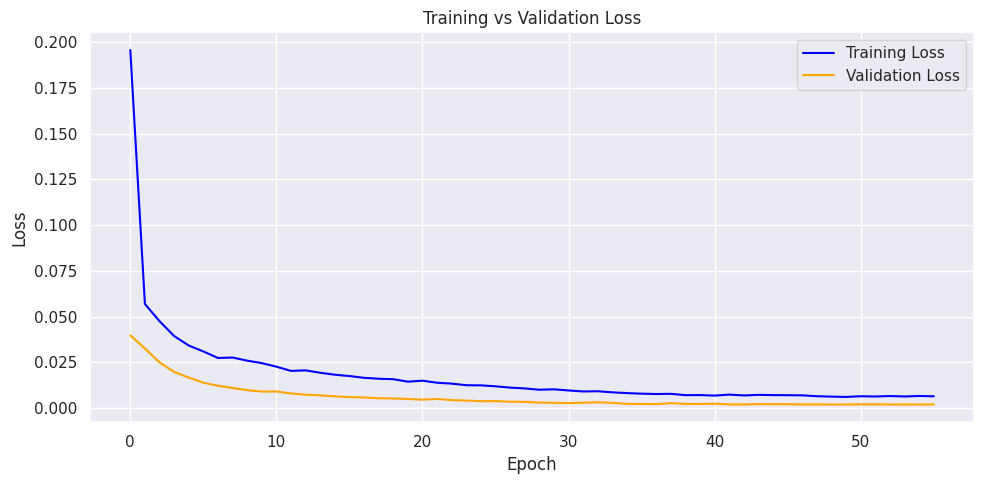

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import matplotlib.pyplot as plt

# Model lebih sederhana
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], 1), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(LSTM(16, return_sequences=False, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1))

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Plot training vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
predictions

array([[2120.316 ],
       [2120.2705],
       [2120.2168],
       [2120.164 ],
       [2120.115 ],
       [2120.0684],
       [2120.026 ],
       [2119.9844],
       [2119.941 ],
       [2119.8992],
       [2119.8582],
       [2119.8176],
       [2119.7751],
       [2119.7288],
       [2119.6848],
       [2119.6416],
       [2119.5928],
       [2119.5374],
       [2119.4822],
       [2119.428 ],
       [2119.3767],
       [2119.3325],
       [2119.294 ],
       [2119.2598],
       [2119.2292],
       [2119.202 ],
       [2119.1753],
       [2119.1506],
       [2119.1296],
       [2119.1106],
       [2119.092 ],
       [2119.0737],
       [2119.0547],
       [2119.0364],
       [2119.0173],
       [2118.9976],
       [2118.9758],
       [2118.9543],
       [2118.9329],
       [2118.9087],
       [2118.8828],
       [2118.85  ],
       [2118.8171],
       [2118.7844],
       [2118.7515],
       [2118.716 ],
       [2118.677 ],
       [2118.6316],
       [2118.5867],
       [2118.545 ],


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


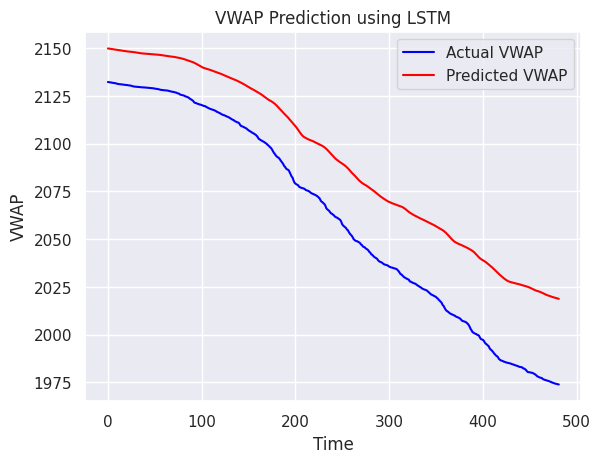

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


import matplotlib.pyplot as plt

plt.plot(y_test_rescaled, color='blue', label='Actual VWAP')
plt.plot(predictions, color='red', label='Predicted VWAP')
plt.title('VWAP Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('VWAP')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

rmse = math.sqrt(mean_squared_error(y_test_rescaled, predictions))
print(f"RMSE: {rmse}")
mae = math.sqrt(mean_absolute_error(y_test_rescaled, predictions))
print(f"MAE: {mae}")

RMSE: 31.803208775603082
MAE: 5.513852954268262


In [ ]:
mean_price = dFrame1['VWAP'].mean()

In [ ]:
print(mean_price)

2437.677005789909


In [ ]:
mae_percent = (mae/mean_price) *100
print(mae_percent)

0.2261929263463493


In [ ]:
import pickle

In [ ]:
model.save('lstm_model.h5')

In [ ]:
data ={
    'scaler' : scaler,
    'model_path':'lstm_model.h5'
}
with open('model_lstm.pkl', 'wb') as f:
    pickle.dump(data,f)

In [ ]:
from keras.models import load_model

with open('model_lstm.pkl', 'rb') as f:
    data = pickle.load(f)

scaler = data['scaler']
model = load_model(data['model_path'])

In [147]:
import pandas as pd

# Load ulang data
dftest = pd.read_csv('data_test1.csv')
dftest

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,08/04/2025,1.645,1.725,1.725,1.600,"141,03M","-10,84%"
1,27/03/2025,1.845,1.840,1.845,1.805,"40,78M","0,27%"
2,26/03/2025,1.840,1.755,1.850,1.750,"58,51M","5,44%"
3,25/03/2025,1.745,1.725,1.745,1.710,"42,87M","-0,29%"
4,24/03/2025,1.750,1.790,1.790,1.700,"64,31M","-2,78%"
5,21/03/2025,1.800,1.800,1.805,1.745,"72,31M","0,00%"
6,20/03/2025,1.800,1.810,1.860,1.785,"76,90M","0,00%"
7,19/03/2025,1.800,1.790,1.810,1.755,"58,04M","0,28%"
8,18/03/2025,1.795,1.815,1.820,1.680,"92,90M","-1,10%"
9,17/03/2025,1.815,1.810,1.825,1.765,"65,13M","0,28%"


NaN values in dataset before cleaning: 0
NaN values in dataset after cleaning: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
Number of test examples: 26
Root Mean Squared Error (RMSE): 0.05
Mean Absolute Error (MAE): 0.05
Mean VWAP in test data: 1.80
MAE as percentage of mean VWAP: 2.72%


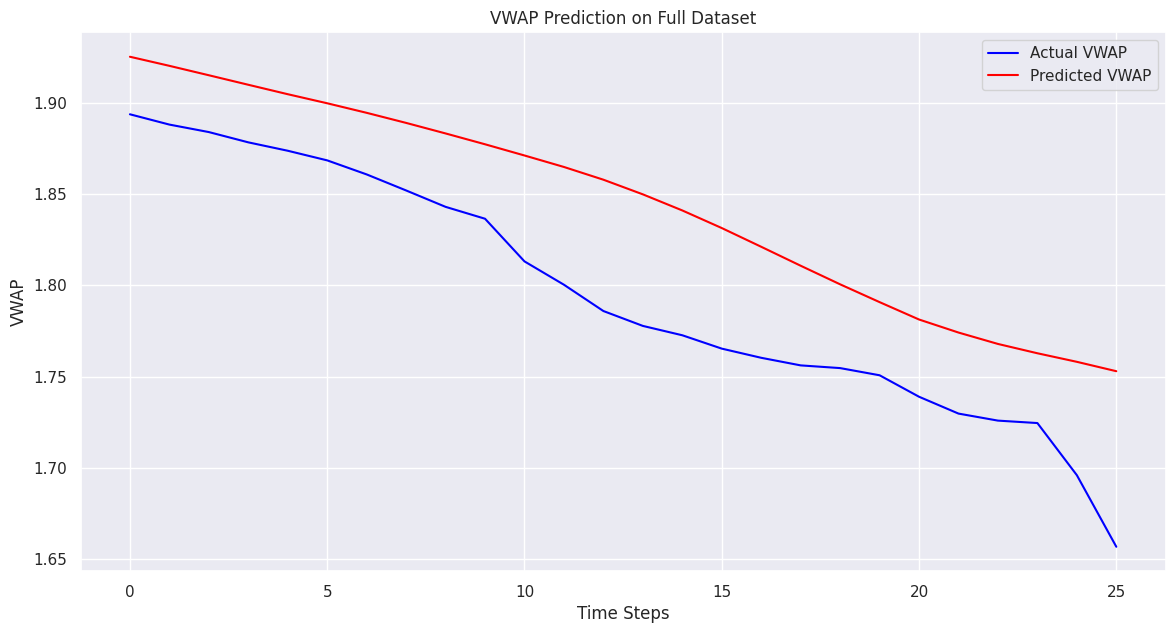

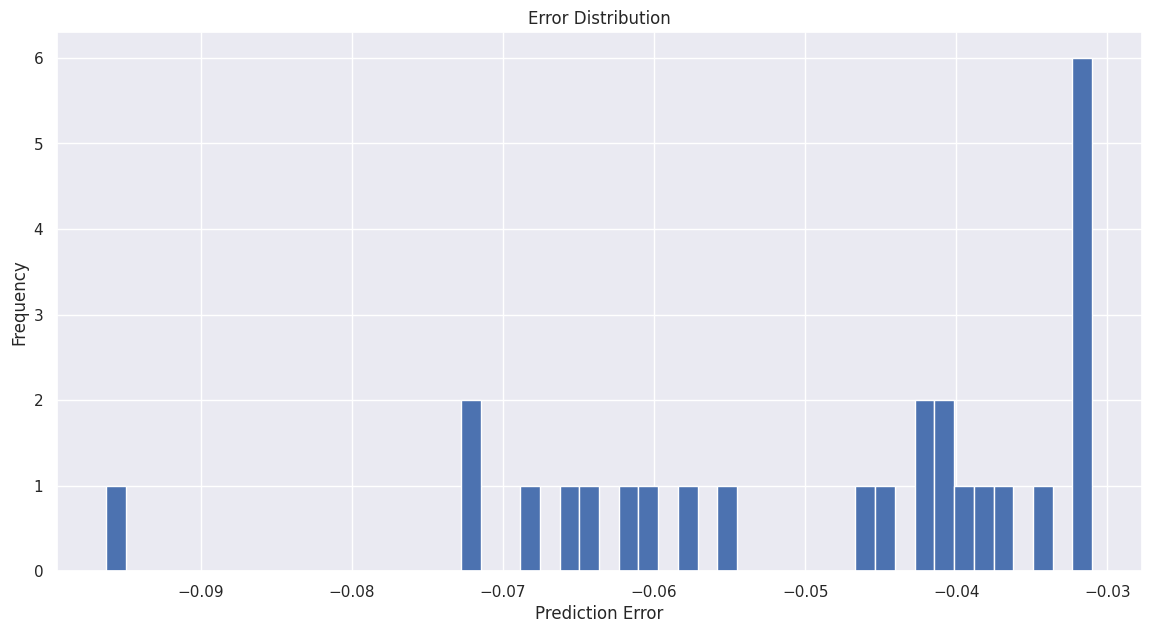

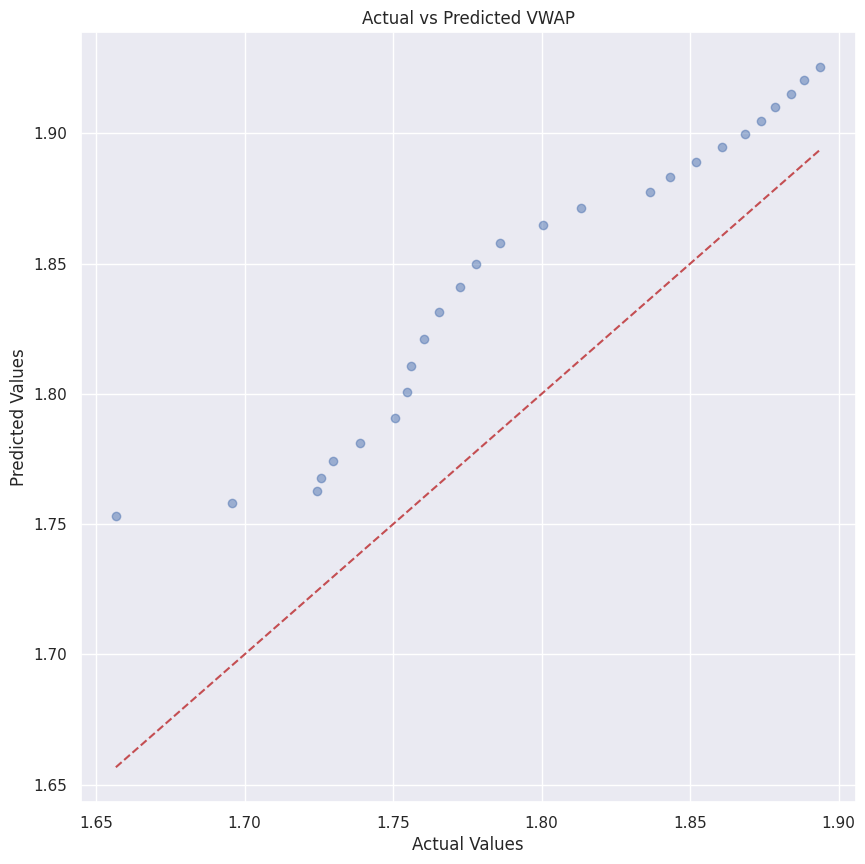

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step

Next day VWAP prediction: 1.75

Test results saved to 'lstm_full_results.csv'


In [149]:
# 3. Apply the same preprocessing steps as in your original code
dftest['Tanggal'] = pd.to_datetime(dftest['Tanggal'], format='%d/%m/%Y')
# Convert volume using your function
def convert_volume(vol_str):
    if isinstance(vol_str, str):
        vol_str = vol_str.replace(',', '.')
        multiplier = 1
        if vol_str.endswith('B'):
            multiplier = 1_000_000_000
            vol_str = vol_str.replace('B', '')
        elif vol_str.endswith('M'):
            multiplier = 1_000_000
            vol_str = vol_str.replace('M', '')
        elif vol_str.endswith('K'):
            multiplier = 1_000
            vol_str = vol_str.replace('K', '')
        return float(vol_str) * multiplier
    return vol_str

dftest['Vol.'] = dftest['Vol.'].apply(convert_volume)
dftest['Terakhir'] = dftest['Terakhir'].astype(str).str.replace(',', '.').astype(float)
dftest['Pembukaan'] = dftest['Pembukaan'].astype(str).str.replace(',', '.').astype(float)
dftest['Tertinggi'] = dftest['Tertinggi'].astype(str).str.replace(',', '.').astype(float)
dftest['Terendah'] = dftest['Terendah'].astype(str).str.replace(',', '.').astype(float)
dftest['Perubahan%'] = dftest['Perubahan%'].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)

# Calculate VWAP as you did in your original code
dftest['Typical_Price'] = (dftest['Tertinggi'] + dftest['Terendah'] + dftest['Terakhir']) / 3
dftest['TPxVol'] = dftest['Typical_Price'] * dftest['Vol.']
dftest['Cum_TPxVol'] = dftest['TPxVol'].cumsum()
dftest['Cum_Vol'] = dftest['Vol.'].cumsum()
dftest['VWAP'] = dftest['Cum_TPxVol'] / dftest['Cum_Vol']

# Check for NaN values and handle them
print(f"NaN values in dataset before cleaning: {dftest['VWAP'].isna().sum()}")

# Handle NaN values - either drop or fill them
dftest = dftest.dropna(subset=['VWAP']).reset_index(drop=True)

print(f"NaN values in dataset after cleaning: {dftest['VWAP'].isna().sum()}")

# Sort by date to ensure chronological order
dftest = dftest.sort_values('Tanggal').reset_index(drop=True)

# Use ALL VWAP values for testing (no splitting)
test_data = dftest['VWAP'].values.reshape(-1, 1)

# Double check for any remaining NaN values in the test data
if np.isnan(test_data).any():
    print("Warning: Test data still contains NaN values. Cleaning...")
    # Create a mask of non-NaN values
    mask = ~np.isnan(test_data.flatten())
    # Filter out NaN values
    test_data = test_data[mask].reshape(-1, 1)
    print(f"Test data shape after removing NaN values: {test_data.shape}")

# IMPORTANT: Load or recreate the scaler used during training
# You should have saved this during training, or recreate it here
# For example, if you know the original min/max values:
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler.fit(original_training_data)  # You would need the original training data

# If you saved the scaler during training, load it:
# from joblib import load
# scaler = load('scaler.joblib')

# If you can't get the original scaler, you'll need to fit a new one on this data
# (though this isn't ideal for real evaluation)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(test_data)  # Note: This isn't ideal for true evaluation

# Scale the test data
scaled_test_data = scaler.transform(test_data)

# 6. Create sequences for LSTM input
n_steps = 10  # Same as in your training
X_test = []
y_test = []

for i in range(len(scaled_test_data) - n_steps):
    X_test.append(scaled_test_data[i:i + n_steps])
    y_test.append(scaled_test_data[i + n_steps])

X_test = np.array(X_test)
y_test = np.array(y_test)

# Check if we have enough data after sequence creation
if len(X_test) == 0:
    print("Error: Not enough data points after NaN removal to create sequences.")
    exit()

# Reshape X_test to match LSTM input shape [samples, time steps, features]
X_test = X_test.reshape(X_test.shape[0], n_steps, 1)

# 7. Make predictions
predictions = model.predict(X_test)

# 8. Inverse transform predictions and actual values
predicted_values = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# 9. Calculate performance metrics
rmse = math.sqrt(mean_squared_error(actual_values, predicted_values))
mae = mean_absolute_error(actual_values, predicted_values)

print(f"Number of test examples: {len(X_test)}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean VWAP in test data: {np.mean(actual_values):.2f}")
print(f"MAE as percentage of mean VWAP: {(mae/np.mean(actual_values))*100:.2f}%")

# 10. Plot results
plt.figure(figsize=(14, 7))
plt.plot(actual_values, color='blue', label='Actual VWAP')
plt.plot(predicted_values, color='red', label='Predicted VWAP')
plt.title('VWAP Prediction on Full Dataset')
plt.xlabel('Time Steps')
plt.ylabel('VWAP')
plt.legend()
plt.grid(True)
plt.show()

# 11. Plot the error distribution
errors = actual_values - predicted_values
plt.figure(figsize=(14, 7))
plt.hist(errors, bins=50)
plt.title('Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 12. Additional visualization: Actual vs Predicted scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(actual_values, predicted_values, alpha=0.5)
plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], 'r--')
plt.title('Actual vs Predicted VWAP')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# 13. Next-Day Prediction Example (only if enough data is available)
if len(scaled_test_data) >= n_steps:
    # Get the most recent data points from your dataset
    last_sequence = scaled_test_data[-n_steps:].reshape(1, n_steps, 1)
    next_prediction = model.predict(last_sequence)
    next_prediction = scaler.inverse_transform(next_prediction)[0][0]
    print(f"\nNext day VWAP prediction: {next_prediction:.2f}")
else:
    print("\nNot enough data points for next-day prediction.")

# 14. Save the test results to CSV
results_df = pd.DataFrame({
    'Actual_VWAP': actual_values.flatten(),
    'Predicted_VWAP': predicted_values.flatten(),
    'Error': errors.flatten()
})
results_df.to_csv('lstm_full_results.csv', index=False)
print("\nTest results saved to 'lstm_full_results.csv'")

In [150]:
dftest['Typical_Price'] = (dftest['Tertinggi'] + dftest['Terendah'] + dftest['Terakhir']) / 3
dftest['TPxVol'] = dftest['Typical_Price'] * dftest['Vol.']
dftest['Cum_TPxVol'] = dftest['TPxVol'].cumsum()
dftest['Cum_Vol'] = dftest['Vol.'].cumsum()
dftest['VWAP'] = dftest['Cum_TPxVol'] / dftest['Cum_Vol']

In [152]:
dftest['VWAP'] = dftest['VWAP'].astype(int)
dftest

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Typical_Price,TPxVol,Cum_TPxVol,Cum_Vol,VWAP
0,2025-02-07,2.270,2.290,2.290,2.230,31790000.0,-0.87,2.263333,7.195137e+07,7.195137e+07,3.179000e+07,2
1,2025-02-10,2.210,2.270,2.270,2.200,40510000.0,-2.64,2.226667,9.020227e+07,1.621536e+08,7.230000e+07,2
2,2025-02-11,2.150,2.210,2.220,2.120,55580000.0,-2.71,2.163333,1.202381e+08,2.823917e+08,1.278800e+08,2
3,2025-02-12,2.240,2.150,2.260,2.140,51490000.0,4.19,2.213333,1.139645e+08,3.963562e+08,1.793700e+08,2
4,2025-02-13,2.210,2.240,2.250,2.190,25860000.0,-1.34,2.216667,5.732300e+07,4.536792e+08,2.052300e+08,2
5,2025-02-14,2.240,2.220,2.240,2.200,25650000.0,1.36,2.226667,5.711400e+07,5.107932e+08,2.308800e+08,2
6,2025-02-17,2.280,2.240,2.300,2.210,26590000.0,1.79,2.263333,6.018203e+07,5.709753e+08,2.574700e+08,2
7,2025-02-18,2.260,2.280,2.300,2.250,31550000.0,-0.88,2.270000,7.161850e+07,6.425938e+08,2.890200e+08,2
8,2025-02-19,2.250,2.270,2.290,2.210,30930000.0,-0.44,2.250000,6.959250e+07,7.121863e+08,3.199500e+08,2
9,2025-02-20,2.200,2.250,2.250,2.190,51770000.0,-2.22,2.213333,1.145843e+08,8.267705e+08,3.717200e+08,2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


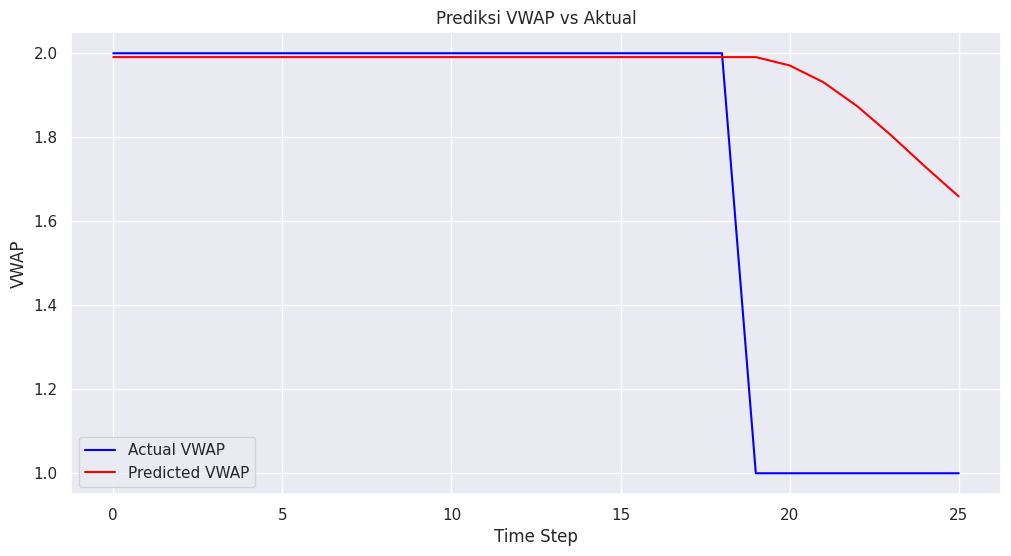

RMSE: 0.44599464103874764
MAE: 0.23594450950622559


In [153]:
# # Step 4: Scale the VWAP values
# scaled_vwap = scaler.transform(dftest['VWAP'].values.reshape(-1, 1))

# # Step 5: Create sequences
# def create_sequences(data, n_steps):
#     X = []
#     for i in range(len(data) - n_steps):
#         X.append(data[i:i + n_steps])
#     return np.array(X)

# n_steps = 10
# X_all = create_sequences(scaled_vwap, n_steps)

# # Step 6: Split data (no randomization)
# train_size = int(len(X_all) * 0.8)
# X_test = X_all[train_size:]

# # Step 7: Predict
# predictions = model.predict(X_test)
# predictions = scaler.inverse_transform(predictions)

# # Step 8: Get actual VWAPs for comparison
# actual_y = dftest['VWAP'].values[n_steps + train_size:]

# # Step 9: Plot results
# plt.figure(figsize=(10,5))
# plt.plot(actual_y, label='Actual VWAP', color='blue')
# plt.plot(predictions, label='Predicted VWAP', color='red')
# plt.title('Model Test - VWAP Prediction')
# plt.xlabel('Time')
# plt.ylabel('VWAP')
# plt.legend()
# plt.show()

# # Step 10: Evaluate
# rmse = math.sqrt(mean_squared_error(actual_y, predictions))
# mae = mean_absolute_error(actual_y, predictions)

# print(f'RMSE: {rmse}')
# print(f'MAE: {mae}')

vwap_data = dftest['VWAP'].values.reshape(-1, 1)



# 3. Scaling VWAP
scaled_vwap = scaler.transform(vwap_data)

# 4. Buat sequence untuk input model LSTM
def create_sequences(data, n_steps):
    X = []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
    return np.array(X)

n_steps = 10  # Sesuai n_steps saat training model
X_test = create_sequences(scaled_vwap, n_steps)

# 5. Prediksi
predicted_scaled = model.predict(X_test)
predicted_vwap = scaler.inverse_transform(predicted_scaled)

# 6. Data VWAP aktual (disesuaikan dengan panjang prediksi)
actual_vwap = vwap_data[n_steps:]

# 7. Plot hasil prediksi vs aktual
plt.figure(figsize=(12, 6))
plt.plot(actual_vwap, label='Actual VWAP', color='blue')
plt.plot(predicted_vwap, label='Predicted VWAP', color='red')
plt.title('Prediksi VWAP vs Aktual')
plt.xlabel('Time Step')
plt.ylabel('VWAP')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Evaluate
rmse = math.sqrt(mean_squared_error(actual_vwap, predicted_vwap))
mae = mean_absolute_error(actual_vwap, predicted_vwap)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')